In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos usando el delimitador correcto
file_path = 'D:\WS_ANALITICA_DATOS\sports_prediction\data\data_jugadores_edad.csv'
data = pd.read_csv(file_path)

# Visualizar las primeras filas del dataset
data.head()

,NombreEquipo,NombreJugador,PrecioJugador,FechaNacimiento,Edad,Nacionalidad,Altura,Posicion,PartidosJugados,ValoracionPromedio,TotalGoles,TotalPasesGol,TotalGolesRecibidos,PorteriaImbatida,MinutosJugados
0,Manchester City,Ederson,56.0,1993-08-17,27,Brasil,1.88,Portero,308,"2,18",0,0,252,146,27.407'
1,Manchester City,Zack Steffen,6.0,1995-04-02,26,Estados Unidos,1.91,Portero,135,"1,53",0,0,187,38,12.240'
2,Manchester City,Scott Carson,0.5,1985-09-03,35,Inglaterra,1.88,Portero,520,"1,44",0,0,657,153,46.770'
3,Manchester City,Rúben Dias,70.0,1997-05-14,23,Portugal,1.87,Defensa central,246,"2,02",13,8,0,0,21.821'
4,Manchester City,Aymeric Laporte,50.0,1994-05-27,26,Francia,1.89,Defensa central,336,"1,88",17,10,0,0,28.801'


C:\Users\vid_2\AppData\Local\Temp\ipykernel_9188\1544496451.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['FechaNacimiento'] = pd.to_datetime(data['FechaNacimiento'], errors='coerce', dayfirst=True)


RMSE: 0.3466488172838209
     Real  Predicho
126  1.89    1.9018
86   1.87    1.4233
441  1.60    1.7605
261  1.87    1.7950
70   1.63    1.8928


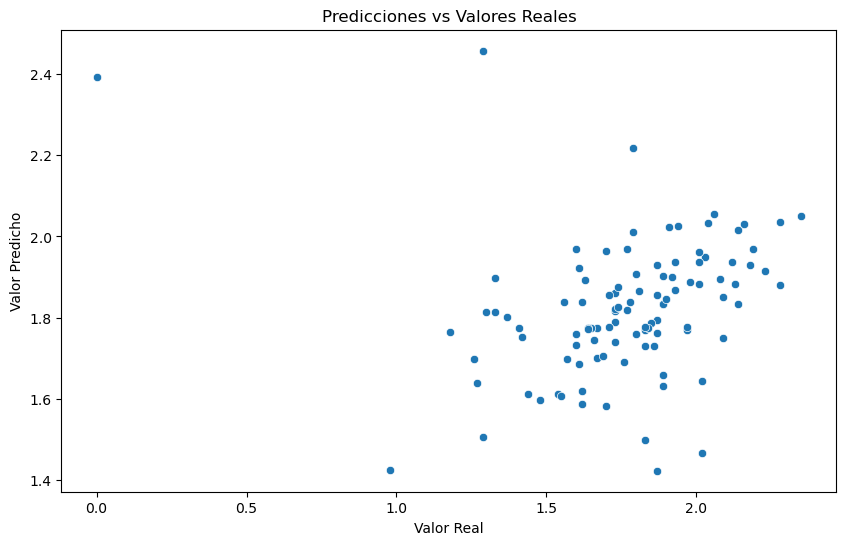

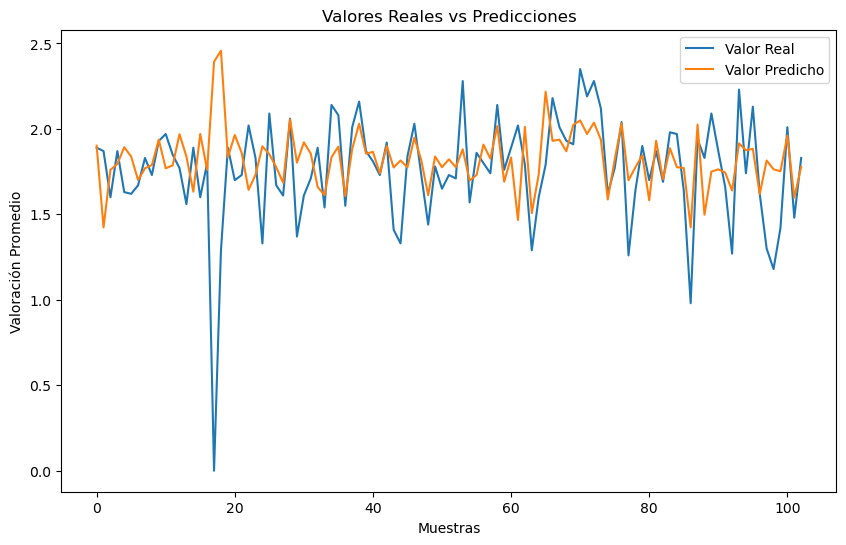

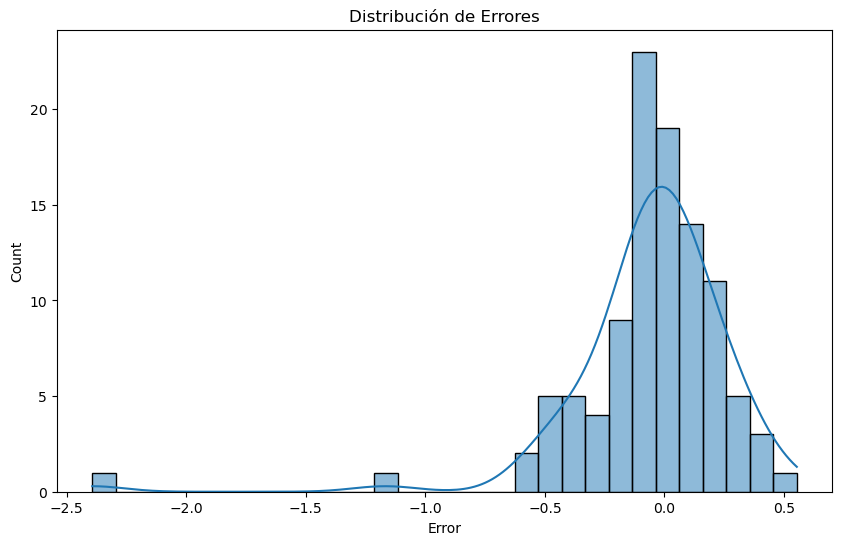

In [3]:



# Convertir la fecha de nacimiento a datetime y calcular la edad (si es necesario)
data['FechaNacimiento'] = pd.to_datetime(data['FechaNacimiento'], errors='coerce', dayfirst=True)
data['Edad'] = data['FechaNacimiento'].apply(lambda x: (pd.Timestamp.now() - x).days // 365 if pd.notnull(x) else np.nan)

# Limpiar y convertir 'MinutosJugados' a float
data['MinutosJugados'] = data['MinutosJugados'].str.replace('.', '').str.replace("'", '').astype(float)

# Limpiar y convertir otras columnas numéricas que estén en formato string
numeric_columns = ['PrecioJugador', 'ValoracionPromedio', 'Altura']
for col in numeric_columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Eliminar filas con valores faltantes
data.dropna(inplace=True)

# Transformar las variables categóricas en variables dummy
data = pd.get_dummies(data, columns=['NombreEquipo', 'Nacionalidad', 'Posicion'])

# Seleccionar las características y la variable objetivo
features = data.drop(['NombreJugador', 'FechaNacimiento', 'ValoracionPromedio'], axis=1)
target = data['ValoracionPromedio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Mostrar algunas predicciones y sus valores reales
predicciones = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print(predicciones.head())

# Visualización de resultados

# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Gráfico de línea de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Valor Real')
plt.plot(y_pred, label='Valor Predicho')
plt.xlabel('Muestras')
plt.ylabel('Valoración Promedio')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Histograma de errores
errores = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errores, kde=True)
plt.xlabel('Error')
plt.title('Distribución de Errores')
plt.show()
